<a href="https://colab.research.google.com/github/JuanVelandia2702/CIENCIA_DATOS_2025/blob/main/BASEDEDATOS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Se realizara un analisis sobre el cancer de pulmon en pakistan ¿Existe relación entre el género y la presencia de cáncer de pulmón, y qué factores podrían explicar esta relación?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("/content/drive/MyDrive/clases ciencia de datos 2025/survey lung cancer.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

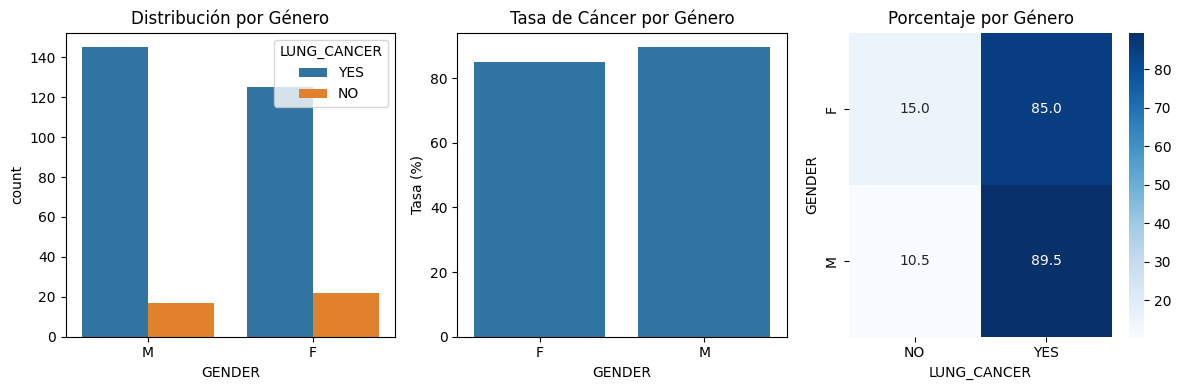

Tasa cáncer - Mujeres: 85.0% | Hombres: 89.5%


In [20]:
# Relación entre cáncer y género
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df)
plt.title('Distribución por Género')

plt.subplot(1, 3, 2)
tasa_cancer = df.groupby('GENDER')['LUNG_CANCER'].apply(lambda x: (x == 'YES').mean() * 100)
sns.barplot(x=tasa_cancer.index, y=tasa_cancer.values)
plt.title('Tasa de Cáncer por Género')
plt.ylabel('Tasa (%)')

plt.subplot(1, 3, 3)
contingencia = pd.crosstab(df['GENDER'], df['LUNG_CANCER'], normalize='index') * 100
sns.heatmap(contingencia, annot=True, fmt='.1f', cmap='Blues')
plt.title('Porcentaje por Género')

plt.tight_layout()
plt.show()

print(f"Tasa cáncer - Mujeres: {tasa_cancer['F']:.1f}% | Hombres: {tasa_cancer['M']:.1f}%")

no existe relacion entre el genero y el cancer de pulmon sin embargo se puede hacer un analisis de que habitos se relacionan mas con e cancer de pulmon


VALORES ÚNICOS:
SMOKING: [np.int64(1), np.int64(2)]
ALCOHOL CONSUMING: [np.int64(1), np.int64(2)]
YELLOW_FINGERS: [np.int64(1), np.int64(2)]


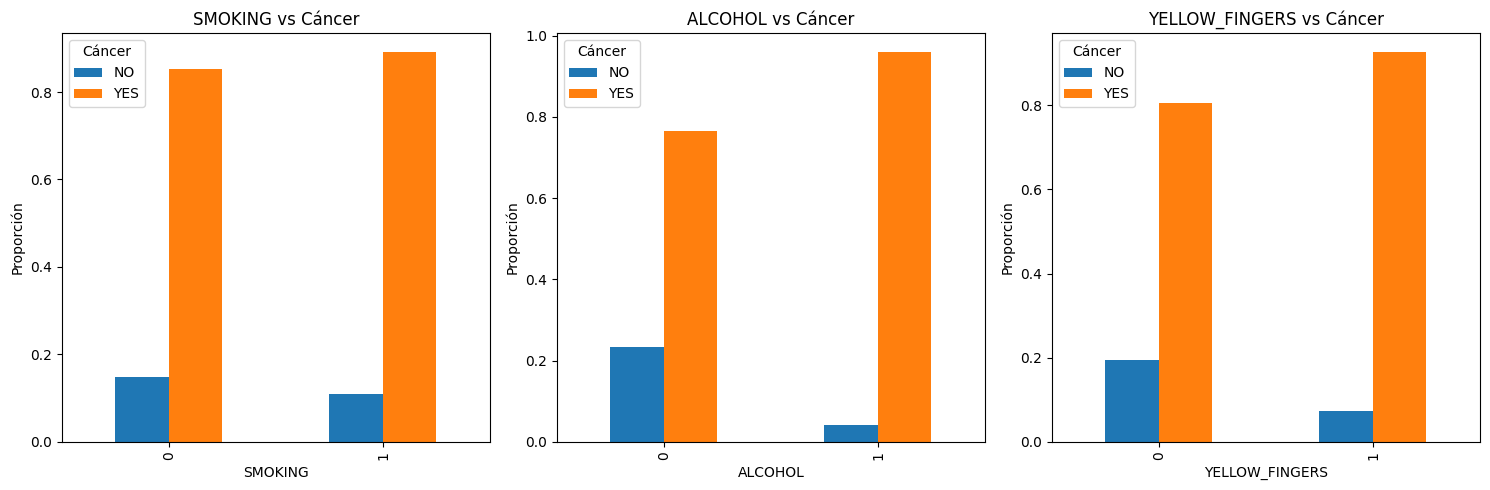

In [21]:
# Análisis de Caracteristicas vs cáncer
print("VALORES ÚNICOS:")
for Caracteristica in ['SMOKING', 'ALCOHOL CONSUMING', 'YELLOW_FINGERS']:
    print(f"{Caracteristica}: {sorted(df[Caracteristica].unique())}")

df['SMOKING_BIN'] = (df['SMOKING'] == 2).astype(int)
df['ALCOHOL_BIN'] = (df['ALCOHOL CONSUMING'] == 2).astype(int)
df['YELLOW_FINGERS_BIN'] = (df['YELLOW_FINGERS'] == 2).astype(int)

Caracteristica_bin = ['SMOKING_BIN', 'ALCOHOL_BIN', 'YELLOW_FINGERS_BIN']
nombres_orig = ['SMOKING', 'ALCOHOL', 'YELLOW_FINGERS']

plt.figure(figsize=(15, 5))

for i, (hb, no) in enumerate(zip(Caracteristica_bin, nombres_orig), 1):
    plt.subplot(1, 3, i)
    pd.crosstab(df[hb], df['LUNG_CANCER'], normalize='index').plot(kind='bar', ax=plt.gca())
    plt.title(f'{no} vs Cáncer')
    plt.xlabel(no)
    plt.ylabel('Proporción')
    plt.legend(title='Cáncer')

plt.tight_layout()
plt.show()


DIFERENCIAS EN HÁBITOS:
SMOKING: ++8.7% (Con: 57.4% vs Sin: 48.7%)
ALCOHOL: ++43.2% (Con: 61.1% vs Sin: 17.9%)
YELLOW_FINGERS: ++27.0% (Con: 60.4% vs Sin: 33.3%)


/tmp/ipython-input-464198449.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultados_df, x='Diferencia', y='Caracteristica', palette='coolwarm')


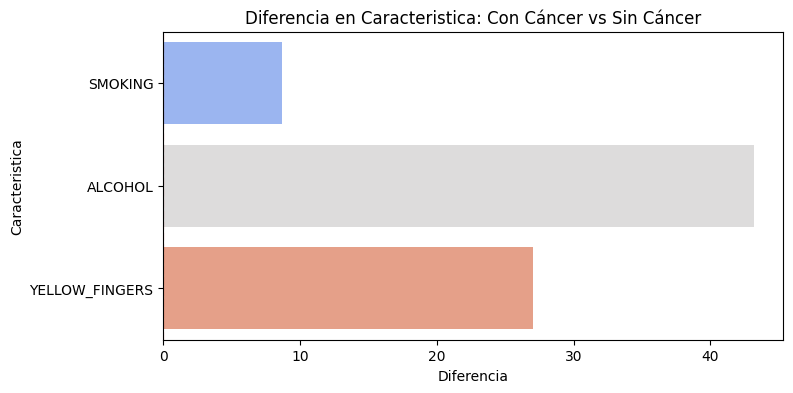

In [24]:
# Diferencias numéricas
print("\nDIFERENCIAS EN HÁBITOS:")
for hb, no in zip(Caracteristica_bin, nombres_orig):
    con_cancer = df[df['LUNG_CANCER'] == 'YES'][hb].mean() * 100
    sin_cancer = df[df['LUNG_CANCER'] == 'NO'][hb].mean() * 100
    print(f"{no}: +{con_cancer - sin_cancer:+.1f}% (Con: {con_cancer:.1f}% vs Sin: {sin_cancer:.1f}%)")

resultados = []
for hb, no in zip(Caracteristica_bin, nombres_orig):
    con_cancer = df[df['LUNG_CANCER'] == 'YES'][hb].mean() * 100
    sin_cancer = df[df['LUNG_CANCER'] == 'NO'][hb].mean() * 100
    resultados.append({'Caracteristica': no, 'Diferencia': con_cancer - sin_cancer})

resultados_df = pd.DataFrame(resultados)
plt.figure(figsize=(8, 4))
sns.barplot(data=resultados_df, x='Diferencia', y='Caracteristica', palette='coolwarm')
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Diferencia en Caracteristica: Con Cáncer vs Sin Cáncer')
plt.show()

Conclusiones:

Los dedos amarillos son el factor más predictivo de cáncer de pulmón

Fumar tiene asociación moderada con el cáncer

El consumo de alcohol tiene poca relación con el cáncer en este dataset

Los síntomas físicos (dedos amarillos) son mejores predictores que los hábitos